In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
sns.set_theme()

In [2]:
def results_generator(l, basedir):
    for d in l:
        cur_dir = os.path.join(basedir, d)
        with open(cur_dir, 'r') as file:
            elems = file.read().split('\n')[:-1]
            elems = [float(e) for e in elems]
            m = sum(elems) / len(elems)
            yield m

In [3]:
numerical = [int(dir) for dir in os.listdir('results/mm/from_device')]
numerical.sort()
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/mm/from_device/'))
results2 = list(results_generator(l, 'results/mm/from_host/'))
results3 = list(results_generator(l, 'results/mm/untouched/'))
results4 = list(results_generator(l, 'results/mm/device_mem/'))
results5 = list(results_generator(l, 'results/mm/device_initialized_mem/'))

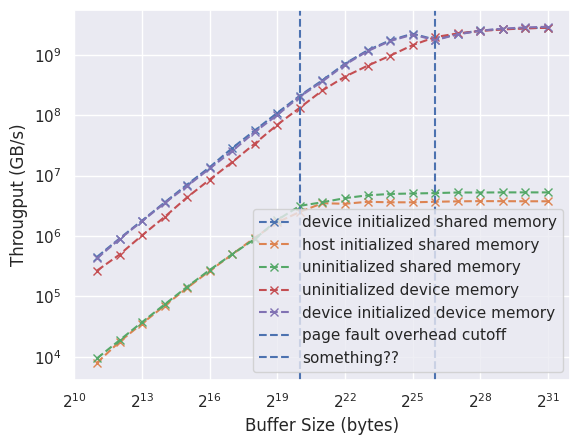

In [4]:
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='device initialized shared memory')
plt.plot(numerical, results2, '--x', label='host initialized shared memory')
plt.plot(numerical, results3, '--x', label='uninitialized shared memory')
plt.plot(numerical, results4, '--x', label='uninitialized device memory')
plt.plot(numerical, results5, '--x', label='device initialized device memory')
plt.axvline(x=2**20, ls='--', label = 'page fault overhead cutoff')
plt.axvline(x=2**26, ls='--', label = 'something??')
plt.legend()
plt.show()

In [5]:
numerical = [int(dir) for dir in os.listdir('results/cooperative')]
numerical.sort()
numerical = numerical[1:]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/cooperative/'))
results2 = list(results_generator(l, 'results/dynamic/'))
results3 = list(results_generator(l, 'results/host/'))
results4 = list(results_generator(l, 'results/flattened/'))

FileNotFoundError: [Errno 2] No such file or directory: 'results/host/64'

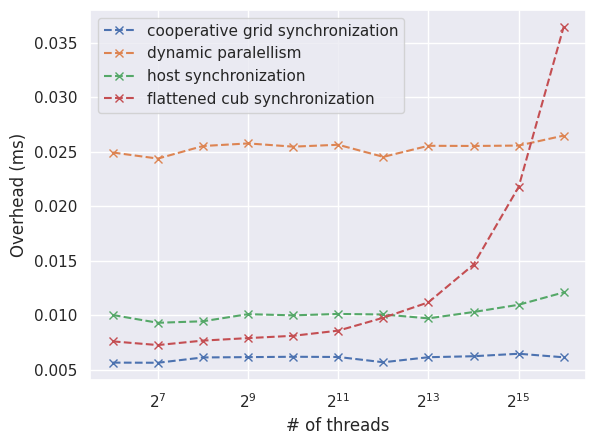

In [ ]:
plt.xscale('log', base=2)
plt.xlabel('# of threads')
plt.ylabel('Overhead (ms)')
plt.plot(numerical, results1, '--x', label='cooperative grid synchronization')
plt.plot(numerical, results2, '--x', label='dynamic paralellism')
plt.plot(numerical, results3, '--x', label='host synchronization')
plt.plot(numerical, results4, '--x', label='flattened cub synchronization')
plt.legend()
plt.show()

In [ ]:
numerical = [int(dir) for dir in os.listdir('results/hmm/device_modified')]
numerical.sort()
# numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/hmm/device_modified/'))
results2 = list(results_generator(l, 'results/hmm/host_modified/'))
results3 = list(results_generator(l, 'results/hmm/host_invalidated/'))
results4 = list(results_generator(l, 'results/hmm/host_exclusive/'))
results5 = list(results_generator(l, 'results/hmm/untouched/'))
results6 = list(results_generator(l, 'results/hmm/device_mem/'))

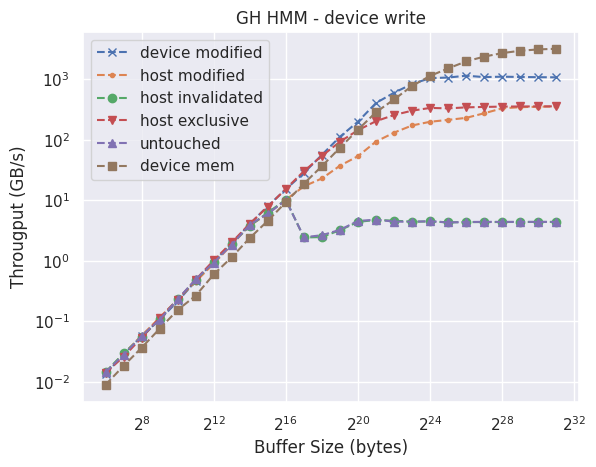

In [ ]:
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title('GH HMM - device write')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='device modified')
plt.plot(numerical, results2, '--.', label='host modified')
plt.plot(numerical, results3, '--o', label='host invalidated')
plt.plot(numerical, results4, '--v', label='host exclusive')
plt.plot(numerical, results5, '--^', label='untouched')
plt.plot(numerical, results6, '--s', label='device mem')
plt.legend()
plt.show()


In [43]:
numerical = [int(dir) for dir in os.listdir('results/tiny/single/untouched')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/single/untouched/'))
results2 = list(results_generator(l, 'results/tiny/single/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/single/device_modified/'))

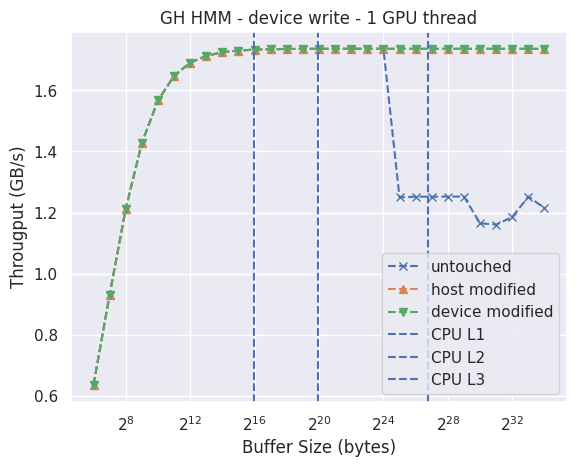

In [44]:
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU thread')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

In [45]:
numerical = [int(dir) for dir in os.listdir('results/tiny/warp/untouched')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/warp/untouched/'))
results2 = list(results_generator(l, 'results/tiny/warp/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/warp/device_modified/'))

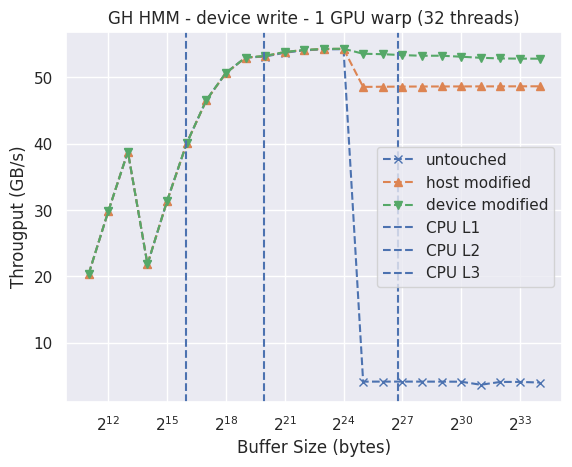

In [46]:
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU warp (32 threads)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

In [47]:
numerical = [int(dir) for dir in os.listdir('results/tiny/block/untouched')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/block/untouched/'))
results2 = list(results_generator(l, 'results/tiny/block/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/block/device_modified/'))

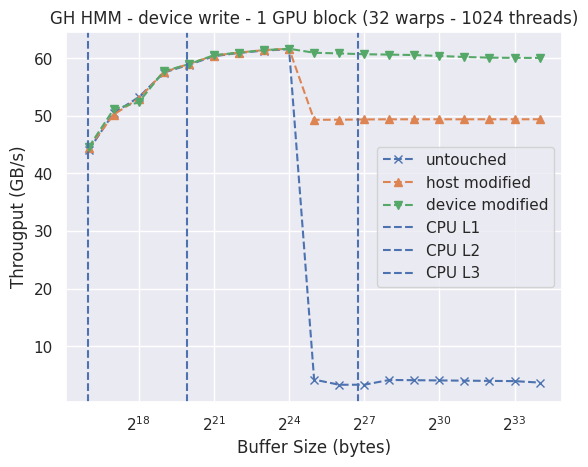

In [48]:
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU block (32 warps - 1024 threads)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

In [49]:
numerical = [int(dir) for dir in os.listdir('results/tiny/full/untouched')]
numerical.sort()
numerical = numerical[:-1]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/full/untouched/'))
results2 = list(results_generator(l, 'results/tiny/full/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/full/device_modified/'))

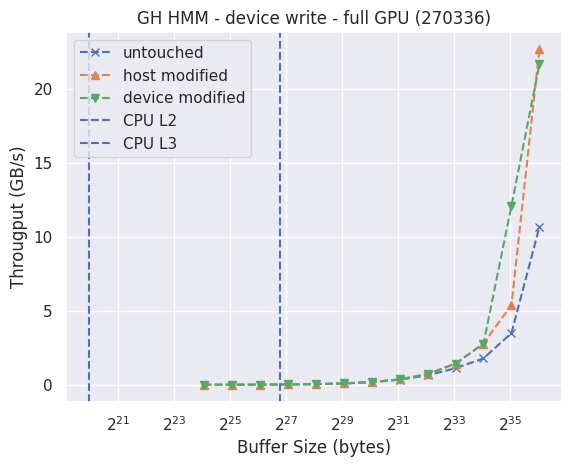

In [50]:
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - full GPU (270336)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

<BarContainer object of 2 artists>

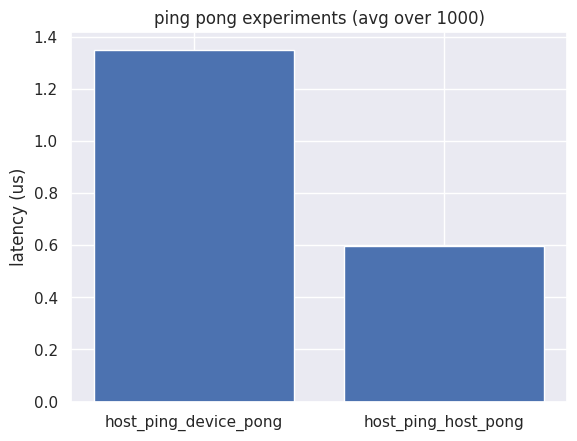

In [32]:
experiments = ['host_ping_device_pong', 'host_ping_host_pong']
data = []

for e in experiments:
    with open('results/atomic/' + e, 'r') as file:
        elems = file.read().split('\n')[:-1]
        elems = [float(e) for e in elems]
        data.append(sum(elems) / len(elems))

plt.title('ping pong experiments (avg over 1000)')
plt.ylabel('latency (us)')
plt.bar(experiments, data)

In [65]:
numerical = [int(dir) for dir in os.listdir('results/host/local_modified_write')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/host/local_modified_write/'))
results2 = list(results_generator(l, 'results/host/other_modified_write/'))
results3 = list(results_generator(l, 'results/host/invalid_write/'))

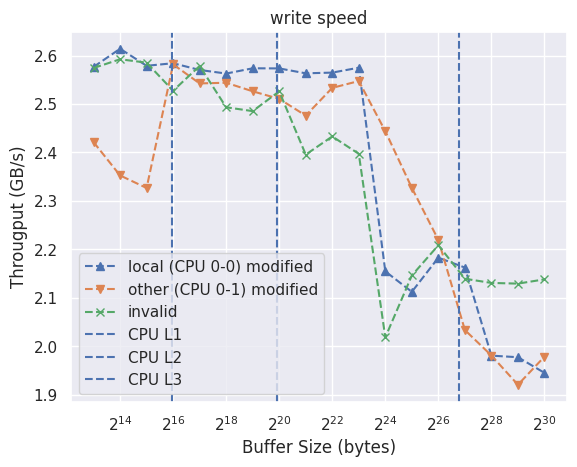

In [66]:
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('write speed')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--^', label='local (CPU 0-0) modified')
#plt.errorbar(numerical, results1, yerr=np.sqrt(np.var(np.array(results1))))
plt.plot(numerical, results2, '--v', label='other (CPU 0-1) modified')
#plt.errorbar(numerical, results2, yerr=np.sqrt(np.var(np.array(results2))))
plt.plot(numerical, results3, '--x', label='invalid')
#plt.errorbar(numerical, results3, yerr=np.sqrt(np.var(np.array(results3))))
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()